

# Cart Pole Domain Description
## https://gymnasium.farama.org/environments/classic_control/cart_pole/

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.

## Observation Space
The observation is a ndarray with shape (4,) with the values corresponding to the following positions and velocities:

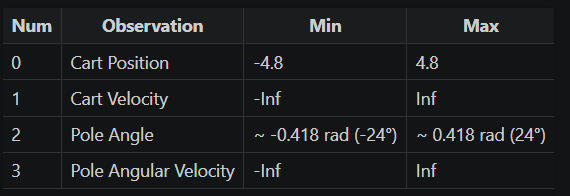

Note: While the ranges above denote the possible values for observation space of each element, it is not reflective of the allowed values of the state space in an unterminated episode. Particularly:

* The cart x-position (index 0) can be take values between (-4.8, 4.8), but the episode terminates if the cart leaves the (-2.4, 2.4) range.

* The pole angle can be observed between (-.418, .418) radians (or ±24°), but the episode terminates if the pole angle is not in the range (-.2095, .2095) (or ±12°)

## Starting State
All observations are assigned a uniformly random value in (-0.05, 0.05)

## Rewards

Since the goal is to keep the pole upright for as long as possible, by default, a reward of +1 is given for every step taken, including the termination step. The default reward threshold is 500 for v1 and 200 for v0 due to the time limit on the environment.

If sutton_barto_reward=True, then a reward of 0 is awarded for every non-terminating step and -1 for the terminating step. As a result, the reward threshold is 0 for v0 and v1.

## Action Space
The action is a ndarray with shape (1,) which can take values {0, 1} indicating the direction of the fixed force the cart is pushed with.

* **0: Push cart to the left**
* **1: Push cart to the right**

Note: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it

## Episode End

The episode ends if any one of the following occurs:

* **Termination:**: Pole Angle is greater than ±12°
* **Termination:**: Position is greater than ±2.4 (center of the cart reaches the edge of the display)
* **Truncation (when using the time_limit wrapper):**: Episode length is greater than 500 (200 for v0)

In [44]:
import gymnasium as gym
env = gym.make("CartPole-v1", render_mode="human")

observation, info = env.reset(seed=42)
total_reward = 0

for _ in range(100):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(0)
    total_reward += reward

    # Render the environment
    env.render()

    if terminated or truncated:
        print(f"Game over! Total Reward: {total_reward}", truncated)
        observation, info = env.reset()
env.close()

Game over! Total Reward: 8.0 False
Game over! Total Reward: 17.0 False
Game over! Total Reward: 27.0 False
Game over! Total Reward: 37.0 False
Game over! Total Reward: 46.0 False
Game over! Total Reward: 54.0 False
Game over! Total Reward: 64.0 False
Game over! Total Reward: 73.0 False
Game over! Total Reward: 83.0 False
Game over! Total Reward: 93.0 False


In [45]:
import gymnasium as gym
import numpy as np
# Create the environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

The main API methods that users of this class need to know are:

Methods:

reset() - Resets the environment to an initial state, required before calling step. Returns the first agent observation for an episode and information, i.e. metrics, debug info.

In [181]:
env.reset(seed=42)

(array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32),
 {})

step() - Updates an environment with actions returning the next agent observation, the reward for taking that actions, if the environment has terminated or truncated due to the latest action and information from the environment about the step, i.e. metrics, debug info.

In [148]:
env.reset(seed=42)

(array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32),
 {})

In [182]:
env.step(1)

(array([ 0.02727336,  0.18847767,  0.03625453, -0.26141977], dtype=float32),
 1.0,
 False,
 False,
 {})

In [72]:
env.step(env.action_space.sample())

(array([ 0.0226114 , -0.39936385,  0.04735721,  0.67200583], dtype=float32),
 1.0,
 False,
 False,
 {})

In [29]:
observation, reward, terminated, truncated, info = env.step(1)

In [30]:
print("Observation Space:",observation," Reward:", reward, " Terminated: ",terminated, " Truncated: ",truncated," Info:", info)

Observation Space: [ 0.03781845  0.34601936 -0.00155785 -0.5702943 ]  Reward: 1.0  Terminated:  False  Truncated:  False  Info: {}


render() - Renders the environments to help visualise what the agent see, examples modes are “human”, “rgb_array”, “ansi” for text.
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [32]:
env.render()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

close() - Closes the environment, important when external software is used, i.e. pygame for rendering, databases

In [7]:
env.close()

Environments have additional attributes for users to understand the implementation

Attributes:

action_space - The Space object corresponding to valid actions, all valid actions should be contained within the space.

In [184]:
env.action_space

Discrete(2)

In [36]:
env.action_space.sample()

0

In [37]:
actions = list(range(env.action_space.n))
actions

[0, 1]

In [38]:
for action in actions:
    print(action)

0
1


observation_space - The Space object corresponding to valid observations, all valid observations should be contained within the space.

In [40]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)